In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import re
from datetime import datetime
warnings.filterwarnings('ignore')

In [5]:
# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")

In [6]:
df_clean = pd.read_csv("covid_clinical_trials_clean.csv")

In [7]:
df_clean.head()

,Unnamed: 0,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,...,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL
0,0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,...,Interventional,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898
1,1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,...,Interventional,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136
2,2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,...,Observational,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482
3,3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,...,Observational,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061
4,4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,...,Observational,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924


### 1. TRIAL DISTRIBUTION BY PHASE AND STATUS

In [8]:
def analyze_strial_distribution(df_clean):
    """
    Analyze the distribution of trials by phase and status.

    """

    # Create figure with subplots
    fig, axes = plt.subplots(2,2, figsize=(15,10), dpi=100)
    fig.suptitle('Trial Distribution by Phase and Status', fontsize=16, fontweight='bold')

    # Plot 1. Trial distribution by phase
    if 'Phases' in df_clean.columns:
        phase_counts = df_clean['Phases'].value_counts()
        axes[0,0].bar(range(len(phase_counts[:10])), phase_counts[:10].values)
        axes[0,0].set_xticks(range(len(phase_counts[:10])))
        axes[0,0].set_xticklabels(phase_counts[:10].index, rotation=45, ha='right')
        axes[0,0].set_title('Top 10 Phases')
        axes[0,0].set_ylabel('Number of Trials')

    # Plot 2. Trial distribution by status
    if 'Status' in df_clean.columns:
        status_counts = df_clean['Status'].value_counts()
        axes[0,1].bar(range(len(status_counts[:10])), status_counts[:10].values)
        axes[0,1].set_xticks(range(len(status_counts[:10])))
        axes[0,1].set_xticklabels(status_counts[:10].index, rotation=45, ha='right')
        axes[0,1].set_title('Top 10 Statuses')
        axes[0,1].set_ylabel('Number of Trials')

    # Plot 3. Phase and status heatmap
    if 'Phases' in df_clean.columns and 'Status' in df_clean.columns:
        phase_status = pd.crosstab(df_clean['Phases'], df_clean['Status'])
        sns.heatmap(phase_status[:10], annot=True, fmt='d', cmap='YlGnBu', ax=axes[1,0])
        axes[1,0].set_title('Phase and Status Heatmap')
        axes[1,0].set_xlabel('Status')
        axes[1,0].set_ylabel('Phase')

    # Plot 4. Study type distribution
    if 'Study Type' in df_clean.columns:
        study_types = df_clean['Study Type'].value_counts()[:5]
        axes[1,1].barh(range(len(study_types)), study_types.values, color='skyblue')
        axes[1,1].set_yticks(range(len(study_types)))
        axes[1,1].set_yticklabels(study_types.index)
        axes[1,1].set_title('Top 5 Study Types')
        axes[1,1].set_xlabel('Number of Trials')

        print(f"Most common study type: {study_types.index[0]} ({study_types.values[0]} trials)")


    plt.tight_layout()
    plt.show()

    return phase_counts, status_counts

Most common study type: Interventional (3321 trials)


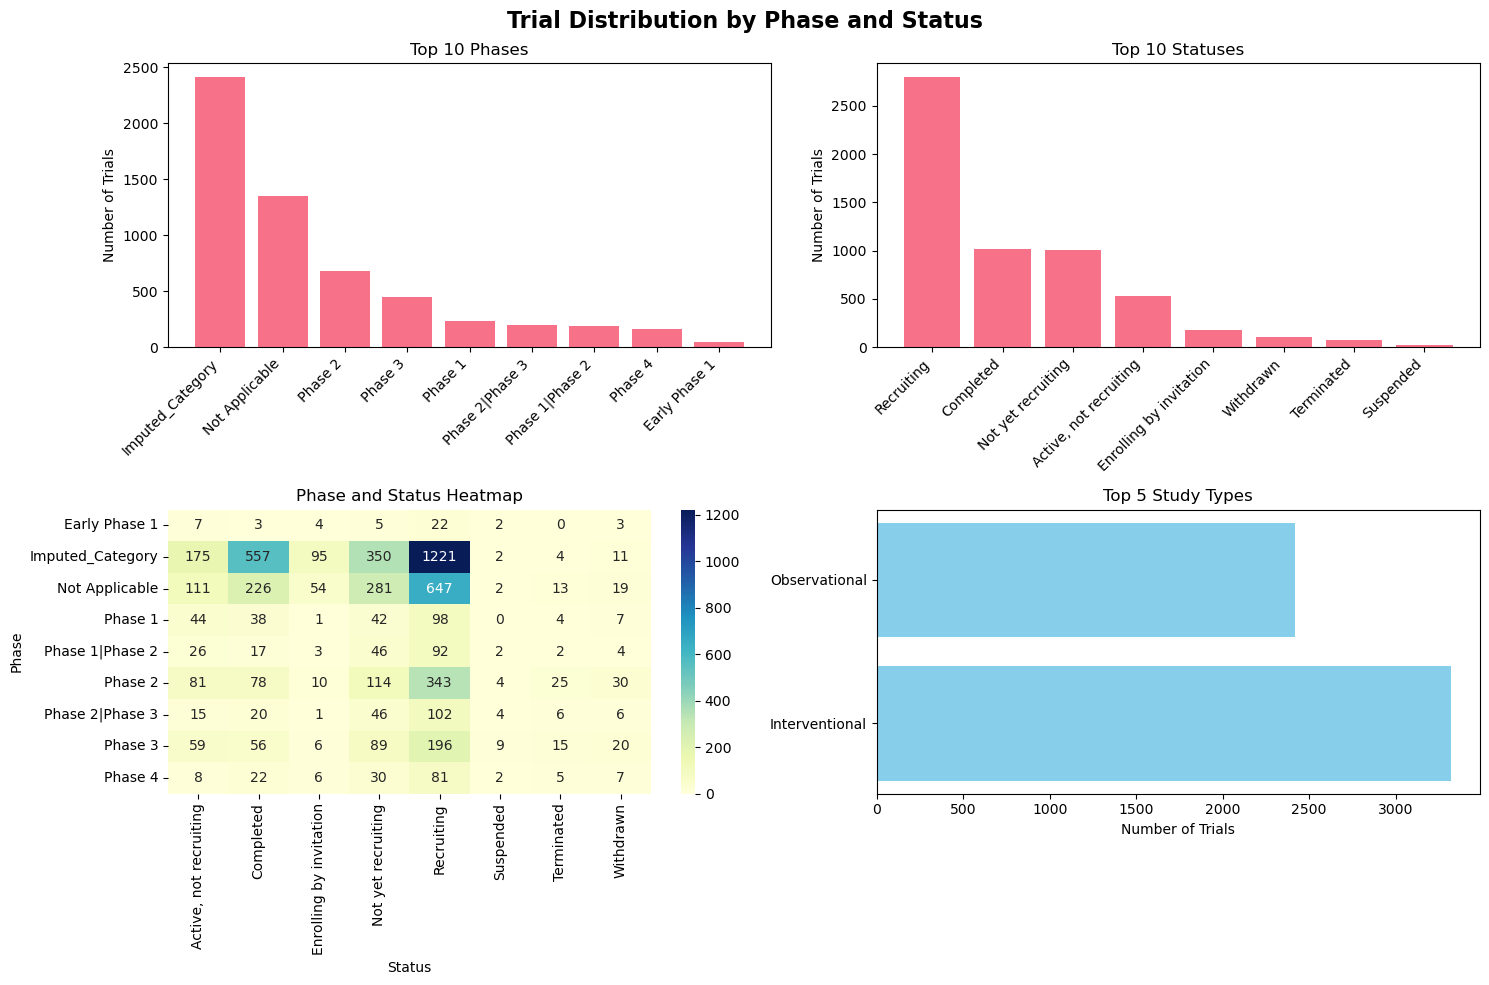

In [9]:
phase_data, status_data = analyze_strial_distribution(df_clean)

### 2. GEOGRAPHIC DISTRIBUTION OF TRIALS

In [10]:
df_clean['Locations'].unique()

array(['Groupe Hospitalier Paris Saint-Joseph, Paris, Ile De France, France',
       'Cimedical, Barranquilla, Atlantico, Colombia',
       'Ospedale Papa Giovanni XXIII, Bergamo, Italy|Policlinico San Marco-San Donato group, Bergamo, Italy|Azienda Ospedaliero-Universitaria di Ferrara, Ferrara, Italy|ASST di Lecco Ospedale Alessandro Manzoni, Lecco, Italy|ASST Melegnano-Martesana, Ospedale Santa Maria delle Stelle, Melzo, Italy|ASST Monza, Monza, Italy|AUSL Romagna-Ospedale Infermi di Rimini, Rimini, Italy|Istituto per la Sicurezza Sociale-Ospedale della Repubblica di San Marino, San Marino, San Marino',
       ...,
       'Die Filderklinik, Filderstadt, Baden-Württemberg, Germany|Herdecke Community Hospital, Herdecke, Nordrhein-Westfalen, Germany',
       'Mental Health Services in the Capital Region, Denmark, Copenhagen, Denmark',
       'Uniformed Services University for the Health Sciences, Bethesda, Maryland, United States|University of Texas Health Science Center San Antonio, San

In [11]:
df_clean['Locations'].head()

0    Groupe Hospitalier Paris Saint-Joseph, Paris, ...
1         Cimedical, Barranquilla, Atlantico, Colombia
2    Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...
3    Hong Kong Sanatorium & Hospital, Hong Kong, Ho...
4                         CHR Orléans, Orléans, France
Name: Locations, dtype: object

In [12]:
df_clean['Country'] = df_clean['Locations'].str.extract(r',\s*([^,]+)$')
df_clean['Country'] = df_clean['Country'].str.strip()

special_cases = {
    'Congo, The Democratic Republic of the': 'The Democratic Republic of the Congo',
    'Korea, Republic of': 'Republic of Korea',
    'Iran, Islamic Republic of': 'Islamic Republic of Iran',
    'Moldova, Republic of': 'Republic of Moldova'
}

# Replace values based on matches in the original 'Locations'
for key, value in special_cases.items():
    df_clean.loc[df_clean['Locations'].str.contains(re.escape(key), na=False), 'Country'] = value

print(df_clean[['Locations', 'Country']].head(10))

                                           Locations        Country
0  Groupe Hospitalier Paris Saint-Joseph, Paris, ...         France
1       Cimedical, Barranquilla, Atlantico, Colombia       Colombia
2  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...     San Marino
3  Hong Kong Sanatorium & Hospital, Hong Kong, Ho...      Hong Kong
4                       CHR Orléans, Orléans, France         France
5  Vinmec Research Institute of Stem cell and Gen...        Vietnam
6  Meharry Medical College, Nashville, Tennessee,...  United States
7  Orthomed Hospital, Chennai, Tamil Nadu, India|...          India
8  IDF COVID 19 Isolation Facility, Ashkelon, Israel         Israel
9  Fundacion Arturo Lopez Perez, Providencia, San...          Chile


In [13]:
df_clean['Country'].unique()

array(['France', 'Colombia', 'San Marino', 'Hong Kong', 'Vietnam',
       'United States', 'India', 'Israel', 'Chile', 'Italy',
       'United Kingdom', 'United Arab Emirates', 'Norway', 'Brazil',
       'Bangladesh', 'Denmark', 'Spain', 'Switzerland', 'Finland',
       'Poland', 'Egypt', 'Turkey', 'Indonesia', 'Canada', 'Belgium',
       'Pakistan', 'Sweden', 'Hungary', 'Albania', 'Sudan', 'Nigeria',
       'Slovenia', 'Islamic Republic of Iran', 'Martinique', 'Portugal',
       'Republic of Korea', 'Germany', 'Thailand', 'Japan', 'Argentina',
       'Zambia', 'China', 'Mexico', 'Singapore', 'Costa Rica',
       'Philippines', 'Belarus', 'Saudi Arabia', 'Czechia', 'Peru',
       'Netherlands', 'Greece', 'Mongolia', 'Taiwan', 'Tunisia',
       'Russian Federation', 'Puerto Rico', 'Iceland', 'Australia',
       'Slovakia', 'Ecuador', 'South Africa', 'Kenya', 'Malaysia', 'Mali',
       'Croatia', 'Luxembourg', 'Kuwait', 'Paraguay', 'North Macedonia',
       'Monaco', 'Austria', 'French G

In [14]:
df_clean['Country'].nunique()

119

In [15]:
df_clean['Sponsor/Collaborators'].unique()

array(['Groupe Hospitalier Paris Saint Joseph',
       'United Medical Specialties', 'University of Milano Bicocca', ...,
       'University of Illinois at Urbana-Champaign',
       'Mental Health Services in the Capital Region, Denmark|Frederiksberg University Hospital|Defactum, Central Denmark Region|The Danish Mental Health Foundation',
       'The University of Texas Health Science Center at San Antonio|Uniformed Services University of the Health Sciences|Massachusetts General Hospital|Defense Health Agency|59th Medical Wing|Brooke Army Medical Center|C.R.Darnall Army Medical Center'],
      shape=(3607,), dtype=object)

In [16]:
df_clean['Sponsor/Collaborators'].nunique()

3607

In [17]:
if 'Sponsor/Collaborators' in df_clean.columns:
    def specify_sponsor(value):
        if not isinstance(value, str):
            return 'Other'
        val = value.lower()
        if any(word in val for word in ['university', 'college', 'school', 'institute', 'hospital', ]):
            return 'Academic'
        elif any(word in val for word in ['ltd', 'inc', 'pharma', 'bio', 'therapeutics', 'laboratories', 'specialities']):
            return 'Industry'
        else:
            return 'Other'

df_clean['Sponsor_type'] = df_clean['Sponsor/Collaborators'].apply(specify_sponsor)


In [18]:
df_clean['Sponsor_type']

0       Academic
1          Other
2       Academic
3       Academic
4       Academic
          ...   
5731    Academic
5732    Academic
5733    Academic
5734    Academic
5735    Academic
Name: Sponsor_type, Length: 5736, dtype: object

In [19]:
def analyze_geographic_distribution(df_clean):
    """
    Analyze the geographic distribution of trials.

    """

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Geographic Distribution of Trials', fontsize=16, fontweight='bold')

    # Plot 1. Top 15 countries by trial count
    if 'Country' in df_clean.columns:
        country_counts = df_clean['Country'].value_counts()[:15]

    axes[0].barh(range(len(country_counts)), country_counts.values, color='teal')
    axes[0].set_yticks(range(len(country_counts)))
    axes[0].set_yticklabels(country_counts.index)
    axes[0].set_title("Top 15 Countries by Trial Count", fontweight='bold')
    axes[0].set_xlabel("Number of Trials")

    # Plot 2. Analyze by academic/industry type
    sponsor_counts = df_clean['Sponsor_type'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#FFD93D']
    axes[1].pie(sponsor_counts.values,
            labels=sponsor_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors)
    axes[1].set_title('Sponsor Type Distribution', fontweight='bold')
    
    # Plot 3. Top 15 countries by sponsor type (academic/industry)
    if 'Country' in df_clean.columns and 'Sponsor_type' in df_clean.columns:
        top_countries = df_clean['Country'].value_counts().head(15).index
        grouped = (
            df_clean[df_clean['Country'].isin(top_countries)]
            .groupby(['Country', 'Sponsor_type'])
            .size()
            .unstack(fill_value=0)
            .loc[top_countries]
        )

        grouped.plot(
            kind='barh',
            stacked=True,
            color=['#FF6B6B', '#4ECDC4', '#FFD93D'],
            ax=axes[2]
        )

        axes[2].set_title('Top 15 Countries by Sponsor Type', fontsize=12, fontweight='bold')
        axes[2].set_xlabel('Number of Trials')
        axes[2].set_ylabel('Country')
        axes[2].legend(title='Sponsor Type')



    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    
    return country_counts if 'Country' in df_clean.columns else None
    

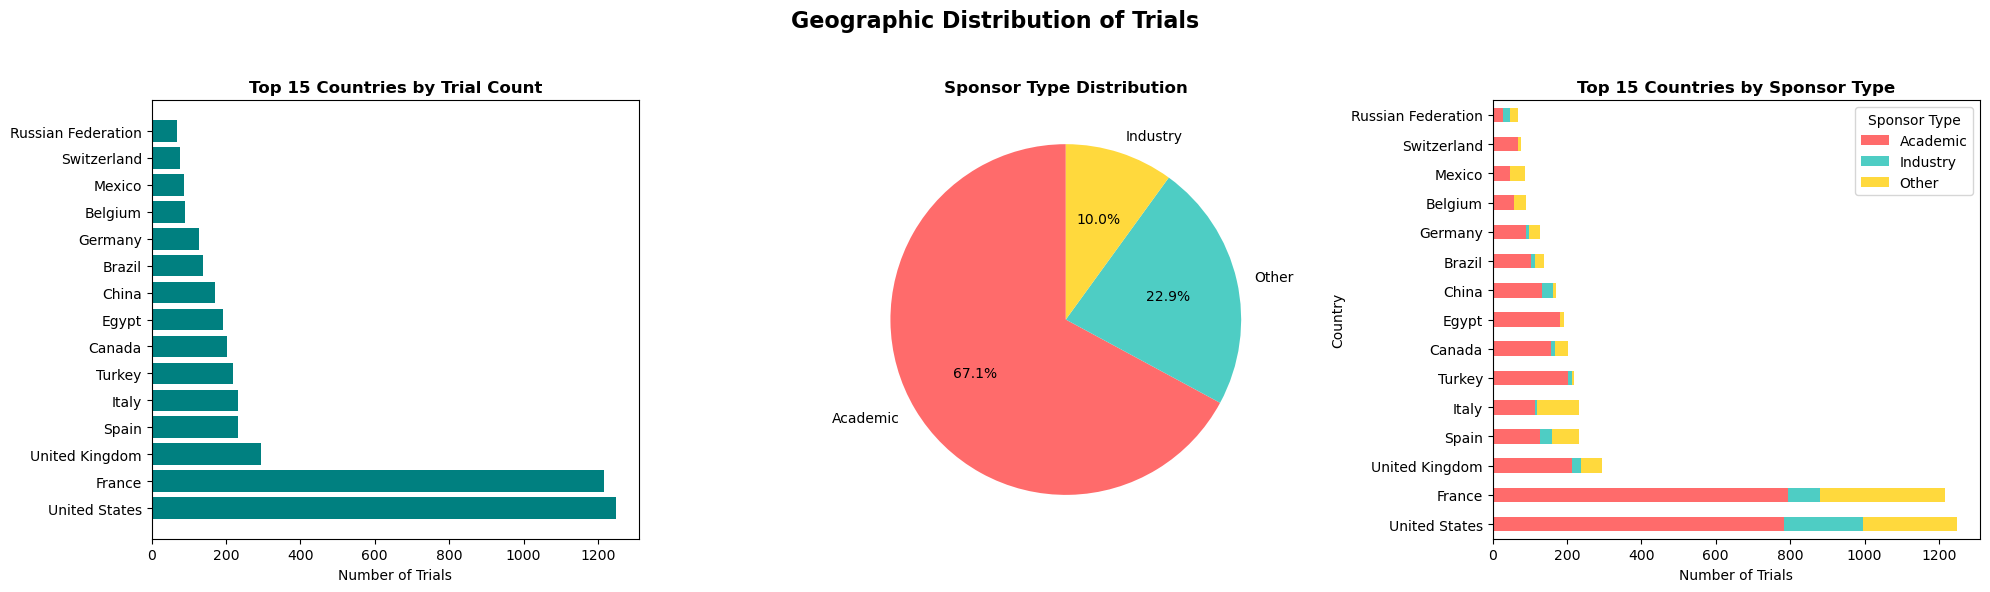

In [20]:
geographic_data = analyze_geographic_distribution(df_clean)

### 3. TIMELINE ANALYSIS

In [21]:
df_clean['Start Date'].min()

'April 1, 2017'

In [22]:
df_clean['Start Date'].max()

'September 9, 2021'

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_timeline(df_clean):
    """
    Analyze timeline of trial starts, completions, and durations.
    """

    fig, axes = plt.subplots(2, 2, figsize=(10, 15))
    fig.suptitle('Clinical Trials Timeline Analysis', fontsize=16)

    # --- Plot 1: Trial starts over time ---
    if 'Start Date' in df_clean.columns:
        df_timeline = df_clean[df_clean['Start Date'].notna()].copy()
        df_timeline['Start Date'] = pd.to_datetime(df_timeline['Start Date'], errors='coerce')
        df_timeline = df_timeline.dropna(subset=['Start Date'])
        df_timeline['Year'] = df_timeline['Start Date'].dt.year

        df_timeline = df_timeline[
            (df_timeline['Year'] >= 2015) & (df_timeline['Year'] <= 2025)
        ]

        yearly_starts = df_timeline.groupby('Year').size()
        axes[0, 0].plot(yearly_starts.index, yearly_starts.values, marker='o', linewidth=2, markersize=8)
        axes[0, 0].set_title('Trials Started by Year')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Number of Trials')
        axes[0, 0].grid(True, alpha=0.3)

        print(f"Peak year for trial starts: {yearly_starts.idxmax()} ({yearly_starts.max()} trials)")

    # --- Plot 2: Trial duration distribution ---
    if 'Start Date' in df_clean.columns and 'Completion Date' in df_clean.columns:
        df_clean = df_clean.copy()

        # Ensure datetime conversion for both date columns
        df_clean['Start Date'] = pd.to_datetime(df_clean['Start Date'], errors='coerce')
        df_clean['Completion Date'] = pd.to_datetime(df_clean['Completion Date'], errors='coerce')

        # 🔧 Compute duration in days
        df_clean['Duration_Days'] = (df_clean['Completion Date'] - df_clean['Start Date']).dt.days

        # Filter for reasonable durations (0 < days < 10 years)
        df_duration = df_clean[
            df_clean['Duration_Days'].notna() &
            (df_clean['Duration_Days'] > 0) &
            (df_clean['Duration_Days'] < 3650)
        ]

        axes[0, 1].hist(df_duration['Duration_Days'], bins=30, color='coral', edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Trial Duration Distribution')
        axes[0, 1].set_xlabel('Duration (Days)')
        axes[0, 1].set_ylabel('Number of Trials')

        # Median line
        median_duration = df_duration['Duration_Days'].median()
        axes[0, 1].axvline(median_duration, color='red', linestyle='--',
                           label=f'Median: {median_duration:.0f} days')
        axes[0, 1].legend()

        print(f"Average trial duration: {df_duration['Duration_Days'].mean():.0f} days")
        print(f"Median trial duration: {median_duration:.0f} days")


    # Plot 3: Monthly distribution (seasonality)
    if 'Start Date' in df_clean.columns:
        df_timeline['Month'] = df_timeline['Start Date'].dt.month
        monthly_starts = df_timeline.groupby('Month').size()
        
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        axes[1,0].bar(range(1, 13), monthly_starts.reindex(range(1, 13), fill_value=0).values, 
                     color='lightgreen', edgecolor='black')
        axes[1,0].set_xticks(range(1, 13))
        axes[1,0].set_xticklabels(month_names)
        axes[1,0].set_title('Trial Starts by Month (All Years)')
        axes[1,0].set_xlabel('Month')
        axes[1,0].set_ylabel('Number of Trials')
        
        peak_month = monthly_starts.idxmax()
        print(f"Peak month for trial starts: {month_names[peak_month-1]}")

    
    # Plot 4: Completion rate over time
    if 'Status' in df_clean.columns and 'Start Date' in df_clean.columns:
        df_timeline['Completed'] = df_timeline['Status'].isin(['Completed', 'Terminated'])
        completion_by_year = df_timeline.groupby('Year')['Completed'].agg(['sum', 'count'])
        completion_by_year['rate'] = (completion_by_year['sum'] / completion_by_year['count'] * 100)
        
        axes[1,1].plot(completion_by_year.index, completion_by_year['rate'].values, 
                      marker='s', linewidth=2, markersize=8, color='purple')
        axes[1,1].set_title('Completion Rate by Year')
        axes[1,1].set_xlabel('Year')
        axes[1,1].set_ylabel('Completion Rate (%)')
        axes[1,1].grid(True, alpha=0.3)
        
        print(f"Average completion rate: {completion_by_year['rate'].mean():.1f}%")
    

    plt.tight_layout()
    plt.show()

    # ✅ Return clean result if available
    return df_duration['Duration_Days'] if 'Duration_Days' in df_clean.columns else None


Peak year for trial starts: 2020 (4235 trials)
Average trial duration: 372 days
Median trial duration: 265 days
Peak month for trial starts: Apr
Average completion rate: 19.1%


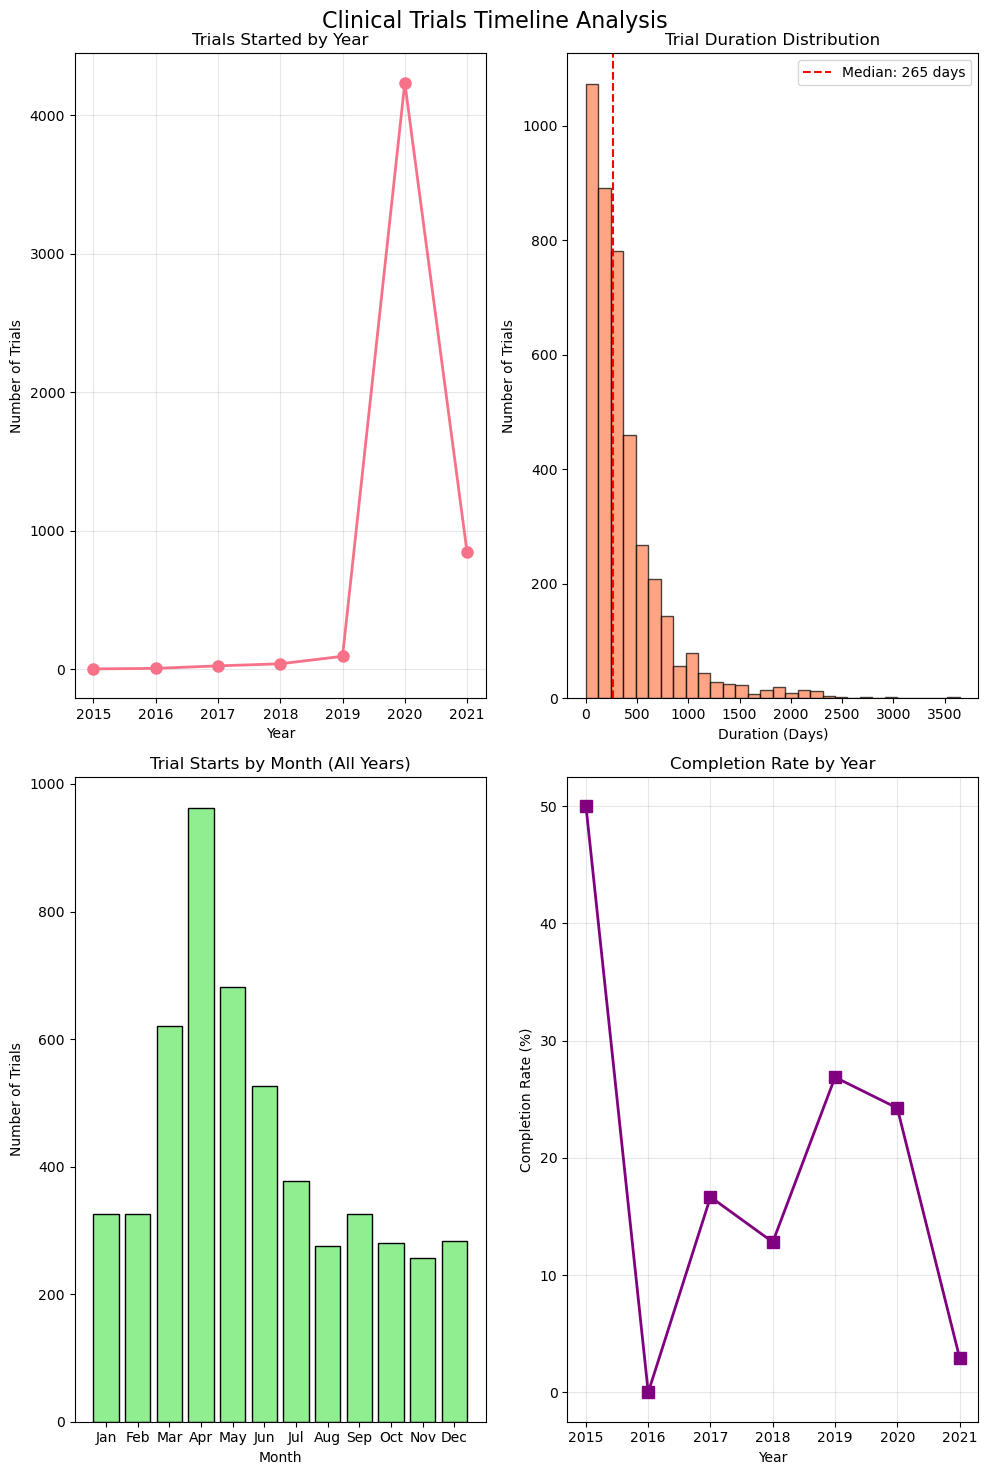

In [24]:
duration_data = analyze_timeline(df_clean)


#### Which phase has highest completion rate?

In [27]:
def analyse_phase_success_rates(df_clean):
    if 'Phases' in df_clean.columns and 'Status' in df_clean.columns:
        # Calculate completion rate by phase
        phase_completion = df_clean.groupby('Phases')['Status'].apply(
            lambda x: (x.isin(['Completed']).sum() / len(x) * 100)
        ).sort_values(ascending=False)

        # Filter phases with at least 10 trials
        phase_counts = df_clean['Phases'].value_counts()
        significant_phases = phase_counts[phase_counts >= 10].index
        phase_completion_filtered = phase_completion[phase_completion.index.isin(significant_phases)]

        # Create visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        bars = ax.bar(range(len(phase_completion_filtered[:10])), 
                      phase_completion_filtered[:10].values,
                      color=plt.cm.RdYlGn(phase_completion_filtered[:10].values/100))
        ax.set_xticks(range(len(phase_completion_filtered[:10])))
        ax.set_xticklabels(phase_completion_filtered[:10].index, rotation=45, ha='right')
        ax.set_title('Top 10 Phases by Completion Rate (min. 10 trials)', fontsize=14)
        ax.set_ylabel('Completion Rate (%)')
        ax.set_ylim(0, 100)
        
        # Add value labels on bars
        for bar, value in zip(bars, phase_completion_filtered[:10].values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{value:.1f}%', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        print("Top 5 phases by completion rate:")
        for i, (phase, rate) in enumerate(phase_completion_filtered[:5].items(), 1):
            count = phase_counts[phase]
            print(f"  {i}. {phase}: {rate:.1f}% completion rate ({count} total trials)")
        
        return phase_completion_filtered
    
    return None



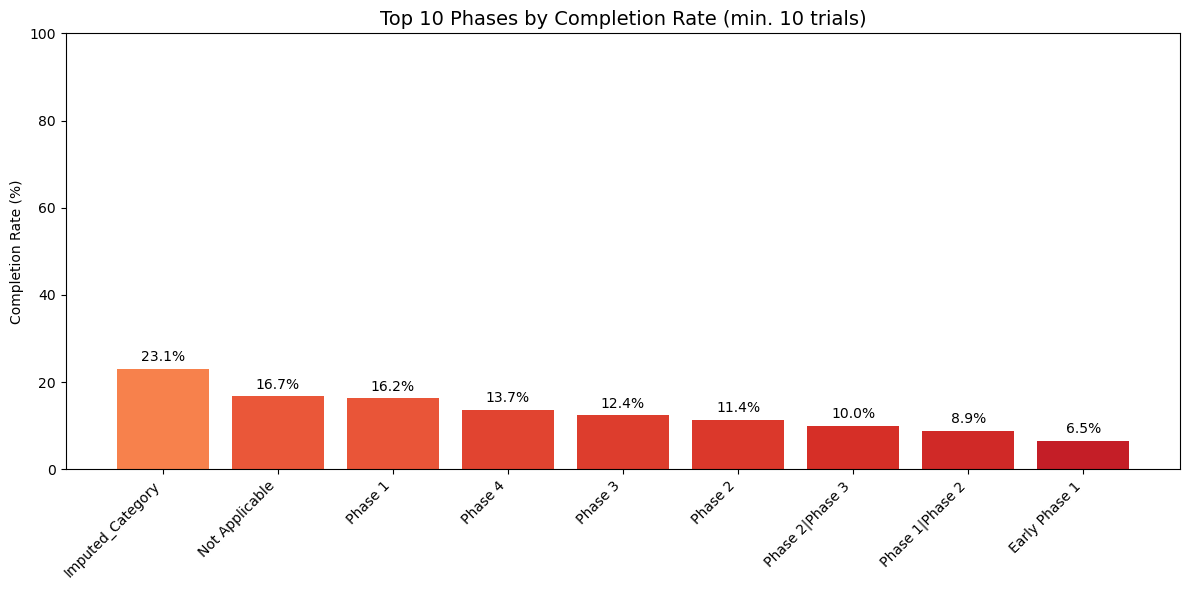

Top 5 phases by completion rate:
  1. Imputed_Category: 23.1% completion rate (2415 total trials)
  2. Not Applicable: 16.7% completion rate (1353 total trials)
  3. Phase 1: 16.2% completion rate (234 total trials)
  4. Phase 4: 13.7% completion rate (161 total trials)
  5. Phase 3: 12.4% completion rate (450 total trials)


In [28]:
phase_success = analyse_phase_success_rates(df_clean)

#### Where are most successful trials?

In [29]:
def analyse_geographic_success(df_clean):
    if 'Country' in df_clean.columns and 'Status' in df_clean.columns:
        
        # Filter for countries with sufficient data
        country_counts = df_clean['Country'].value_counts()
        significant_countries = country_counts[country_counts >= 20].index
        
        df_significant = df_clean[df_clean['Country'].isin(significant_countries)]
        
        # Calculate success metrics by country
        country_success = df_significant.groupby('Country').agg({
            'Status': [
                lambda x: (x == 'Completed').sum(),  # Completed trials
                'count',  # Total trials
                lambda x: (x == 'Completed').sum() / len(x) * 100  # Completion rate
            ]
        }).round(2)
        
        country_success.columns = ['Completed', 'Total', 'Completion_Rate']
        country_success = country_success.sort_values('Completion_Rate', ascending=False)
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Completion rates
        top_10 = country_success.head(10)
        axes[0].barh(range(len(top_10)), top_10['Completion_Rate'].values, color='steelblue')
        axes[0].set_yticks(range(len(top_10)))
        axes[0].set_yticklabels(top_10.index)
        axes[0].set_xlabel('Completion Rate (%)')
        axes[0].set_title('Top 10 Countries by Trial Completion Rate')
        
        # Add value labels
        for i, v in enumerate(top_10['Completion_Rate'].values):
            axes[0].text(v + 0.5, i, f'{v:.1f}%', va='center')
        
        # Plot 2: Volume vs Success scatter
        axes[1].scatter(country_success['Total'], country_success['Completion_Rate'], 
                       alpha=0.6, s=100, c=country_success['Completed'], cmap='viridis')
        axes[1].set_xlabel('Total Number of Trials')
        axes[1].set_ylabel('Completion Rate (%)')
        axes[1].set_title('Trial Volume vs Success Rate by Country')
        
        # Add labels for top countries
        for idx in country_success.head(5).index:
            row = country_success.loc[idx]
            axes[1].annotate(idx, (row['Total'], row['Completion_Rate']), 
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
        print("Top 5 countries by completion rate (min. 20 trials):")
        for i, (country, data) in enumerate(country_success.head(5).iterrows(), 1):
            print(f"  {i}. {country}: {data['Completion_Rate']:.1f}% "
                  f"({data['Completed']:.0f}/{data['Total']:.0f} trials)")
        
        return country_success
    
    return None

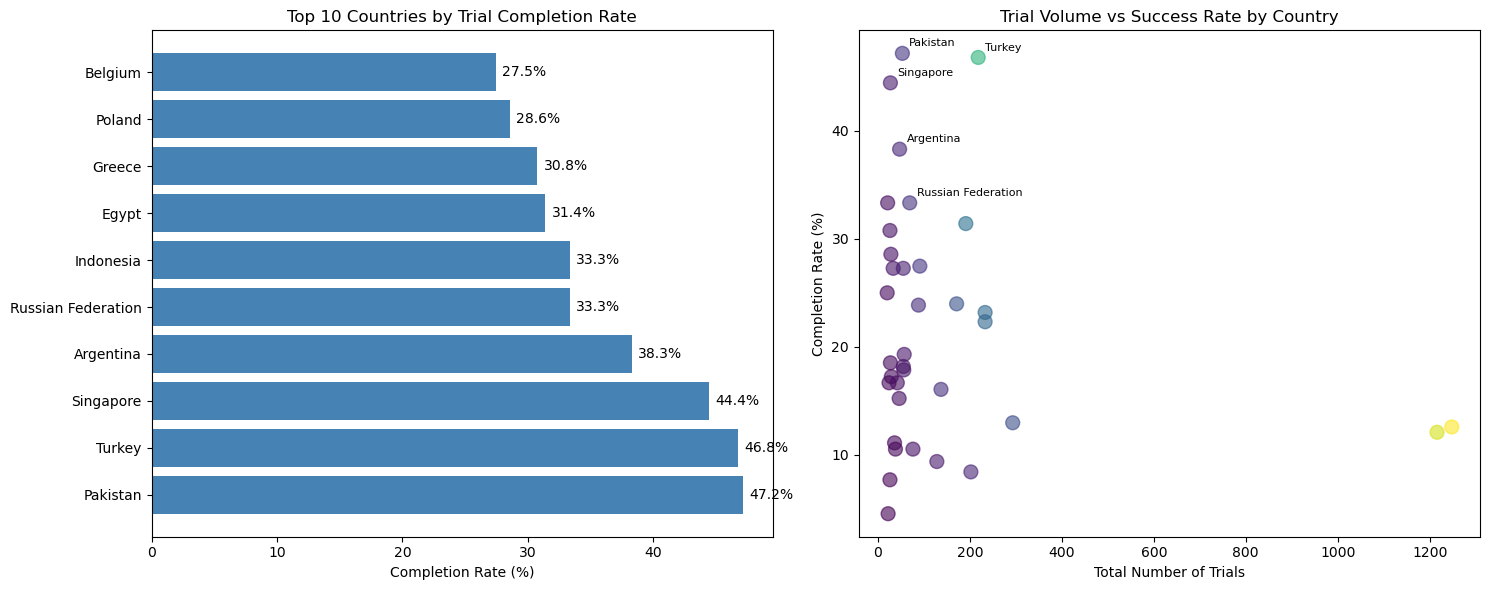

Top 5 countries by completion rate (min. 20 trials):
  1. Pakistan: 47.2% (25/53 trials)
  2. Turkey: 46.8% (102/218 trials)
  3. Singapore: 44.4% (12/27 trials)
  4. Argentina: 38.3% (18/47 trials)
  5. Russian Federation: 33.3% (23/69 trials)


In [30]:
geographic_success = analyse_geographic_success(df_clean)